<a href="https://colab.research.google.com/github/prithvikolla/Compuational_Methods_INFO5731/blob/master/Project_Legal_Text_Mining/LegalTextM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
df = pd.read_excel("/content/stage-1-4.xlsx")

**Exploratory Data Analysis**

In [3]:
df.head()

,Sentence,Target
0,at 994.,Invalid
1,Footnote:,Invalid
2,People v. Francisco S. Palacios and Valerie M. Palacios (D.C. Criminal Case Nos.,Invalid
3,79-0043A and 79-0044A).,Invalid
4,"Miller v. California, 93 S. Ct. 2607, 2616 n.",Invalid


In [4]:
df['Target'].value_counts()

Facts               1829
Analysis            525 
Invalid             342 
Conclusion          324 
Issue               263 
Rule/Law/Holding    225 
Others              133 
Rule/Law/holding    36  
Label_text          1   
Name: Target, dtype: int64

In [5]:
df = df[df['Target'] != 'Label_text']

In [6]:
df['Target'].value_counts()

Facts               1829
Analysis            525 
Invalid             342 
Conclusion          324 
Issue               263 
Rule/Law/Holding    225 
Others              133 
Rule/Law/holding    36  
Name: Target, dtype: int64

In [7]:
df['Target'].replace({'Rule/Law/holding' :'Rule/Law/Holding'}, inplace=True)

In [8]:
df['Target'].value_counts()

Facts               1829
Analysis            525 
Invalid             342 
Conclusion          324 
Issue               263 
Rule/Law/Holding    261 
Others              133 
Name: Target, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 3677
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  3677 non-null   object
 1   Target    3677 non-null   object
dtypes: object(2)
memory usage: 86.2+ KB


In [10]:
print(df['Sentence'].head())

0    at 994.                                                                         
1    Footnote:                                                                       
2    People v. Francisco S. Palacios and Valerie M. Palacios (D.C. Criminal Case Nos.
3    79-0043A and 79-0044A).                                                         
4    Miller v. California, 93 S. Ct. 2607, 2616 n.                                   
Name: Sentence, dtype: object


**Data Cleaning & Transformation**

In [11]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
df['Sentence'] = df['Sentence'].apply(lambda x: x.lower())

In [13]:
df['Sent_Punc'] = df['Sentence'].str.replace('[^\w\s]','')

In [14]:
df.head()

,Sentence,Target,Sent_Punc
0,at 994.,Invalid,at 994
1,footnote:,Invalid,footnote
2,people v. francisco s. palacios and valerie m. palacios (d.c. criminal case nos.,Invalid,people v francisco s palacios and valerie m palacios dc criminal case nos
3,79-0043a and 79-0044a).,Invalid,790043a and 790044a
4,"miller v. california, 93 s. ct. 2607, 2616 n.",Invalid,miller v california 93 s ct 2607 2616 n


In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [16]:
df['Target'] = label.fit_transform(df['Target'])

In [17]:
df['Target'].value_counts()

2    1829
0    525 
3    342 
1    324 
4    263 
6    261 
5    133 
Name: Target, dtype: int64

In [18]:
df['Sent_Punc'].head(10)

0    at 994                                                                                                                    
1    footnote                                                                                                                  
2    people v francisco s palacios and valerie m palacios dc criminal case nos                                                 
3    790043a and 790044a                                                                                                       
4    miller v california 93 s ct 2607 2616 n                                                                                   
5    8 1973 see also united states v                                                                                           
6    obrien 88 s ct 1673 1679 1968                                                                                             
7    ill                                                                                                

In [19]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [21]:
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

In [22]:
df['Sent_Token'] = df['Sent_Punc'].apply(lambda x: word_tokenize(x))

In [23]:
df['Sent_Stop'] = df['Sent_Token'].apply(lambda x: [item for item in x if item not in stopword])

In [24]:
df['Sent_Lemma'] = df['Sent_Stop'].apply(lambda x: [wl.lemmatize(i) for i in x])

In [25]:
df['Sent_Lemma'].head()

0    [994]                                                                      
1    [footnote]                                                                 
2    [people, v, francisco, palacios, valerie, palacios, dc, criminal, case, no]
3    [790043a, 790044a]                                                         
4    [miller, v, california, 93, ct, 2607, 2616, n]                             
Name: Sent_Lemma, dtype: object

In [26]:
test_Sent = df['Sent_Lemma'][2]

In [27]:
test_Sent

['people',
 'v',
 'francisco',
 'palacios',
 'valerie',
 'palacios',
 'dc',
 'criminal',
 'case',
 'no']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 3677
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence    3677 non-null   object
 1   Target      3677 non-null   int64 
 2   Sent_Punc   3677 non-null   object
 3   Sent_Token  3677 non-null   object
 4   Sent_Stop   3677 non-null   object
 5   Sent_Lemma  3677 non-null   object
dtypes: int64(1), object(5)
memory usage: 361.1+ KB


In [29]:
df_cleaned = df.copy()

I want to work on the cleaned part 'Sent_Lemma' and Target, so creating a copy of the previous dataframe and removing the features not necessary.

In [30]:
df_cleaned.head()

,Sentence,Target,Sent_Punc,Sent_Token,Sent_Stop,Sent_Lemma
0,at 994.,3,at 994,"[at, 994]",[994],[994]
1,footnote:,3,footnote,[footnote],[footnote],[footnote]
2,people v. francisco s. palacios and valerie m. palacios (d.c. criminal case nos.,3,people v francisco s palacios and valerie m palacios dc criminal case nos,"[people, v, francisco, s, palacios, and, valerie, m, palacios, dc, criminal, case, nos]","[people, v, francisco, palacios, valerie, palacios, dc, criminal, case, nos]","[people, v, francisco, palacios, valerie, palacios, dc, criminal, case, no]"
3,79-0043a and 79-0044a).,3,790043a and 790044a,"[790043a, and, 790044a]","[790043a, 790044a]","[790043a, 790044a]"
4,"miller v. california, 93 s. ct. 2607, 2616 n.",3,miller v california 93 s ct 2607 2616 n,"[miller, v, california, 93, s, ct, 2607, 2616, n]","[miller, v, california, 93, ct, 2607, 2616, n]","[miller, v, california, 93, ct, 2607, 2616, n]"


In [31]:
df_cleaned = df[['Target','Sent_Lemma']]

In [32]:
df_cleaned['Sent_Lemma'] = df_cleaned['Sent_Lemma'].apply(lambda x: ' '.join(map(str, x)) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df_cleaned.head()

,Target,Sent_Lemma
0,3,994
1,3,footnote
2,3,people v francisco palacios valerie palacios dc criminal case no
3,3,790043a 790044a
4,3,miller v california 93 ct 2607 2616 n


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df_cleaned['Sent_Lemma'])
print(X_tfidf.shape)

(3677, 6403)


In [35]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,10,100,1000,10000,100000,10000000,10000â,1000x22,1006,1008,1008a,100x22,102,1020,1030,1042,1044,105,10511,1056,1065,107,108,1099,10a,10acre,11,110,1102,111,1116,112,1120,113,1130,113637,1140,114073,115,1150,...,âœsuccessively,âœtell,âœtestâ,âœthat,âœthatâs,âœthe,âœthem,âœthere,âœthey,âœthick,âœthis,âœthumbusterâ,âœto,âœtommy,âœtoo,âœtwo,âœunless,âœupon,âœvery,âœvisited,âœwaived,âœwalked,âœwas,âœwe,âœweaving,âœwell,âœwhen,âœwhere,âœwhether,âœwhipped,âœwhisky,âœwhoever,âœwhy,âœwilliam,âœwobblyâ,âœwould,âœyes,âœyou,âœyour,âœyâ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**ML Prediction with Un balanced Data**

Class 0: 525
Class 1: 324
Class 2: 1829
Class 3: 342
Class 4: 263
Class 5: 133
Class 6: 261


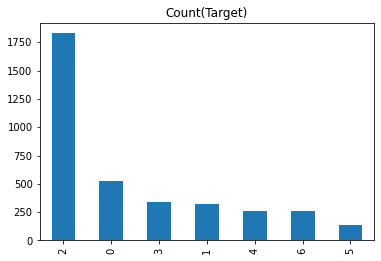

In [36]:
target_count = df.Target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
print('Class 5:', target_count[5])
print('Class 6:', target_count[6])
target_count.plot(kind='bar', title='Count(Target)');

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [38]:
X = X_tfidf_df
y = df_cleaned['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred))

Accuracy: 54.89%
              precision    recall  f1-score   support

           0       0.45      0.15      0.22       157
           1       0.57      0.29      0.38       101
           2       0.55      0.95      0.70       538
           3       0.76      0.11      0.20       114
           4       0.68      0.19      0.29        81
           5       0.50      0.02      0.04        44
           6       0.52      0.17      0.26        69

    accuracy                           0.55      1104
   macro avg       0.58      0.27      0.30      1104
weighted avg       0.56      0.55      0.47      1104



In [39]:
#using smote and stochastic gradient boosting
from sklearn.linear_model import SGDClassifier

X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

Accuracy 0.5615942028985508
              precision    recall  f1-score   support

           0       0.38      0.32      0.35       167
           1       0.49      0.45      0.47       100
           2       0.69      0.78      0.74       540
           3       0.39      0.33      0.36       107
           4       0.42      0.45      0.44        75
           5       0.33      0.10      0.15        52
           6       0.32      0.40      0.36        63

    accuracy                           0.56      1104
   macro avg       0.43      0.40      0.41      1104
weighted avg       0.54      0.56      0.55      1104



The accuracy is too low while using Un balanced Data.

**ML Prediction with balanced data**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class=3, n=1829 (14.286%)
Class=2, n=1829 (14.286%)
Class=4, n=1829 (14.286%)
Class=6, n=1829 (14.286%)
Class=1, n=1829 (14.286%)
Class=0, n=1829 (14.286%)
Class=5, n=1829 (14.286%)


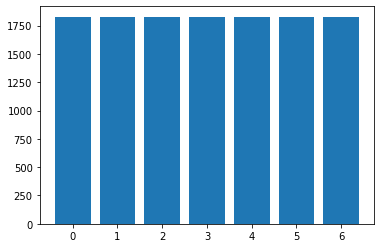

In [44]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(X_tfidf_df, df['Target'])
# summarize distribution
counter = Counter(y_ROS)
for k,v in counter.items():
	per = v / len(y_ROS) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_ROS,y_ROS, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred))

Accuracy: 67.27%
              precision    recall  f1-score   support

           0       0.63      0.53      0.58       566
           1       0.72      0.76      0.74       524
           2       0.60      0.50      0.55       557
           3       0.78      0.52      0.62       528
           4       0.74      0.76      0.75       560
           5       0.56      0.90      0.69       549
           6       0.77      0.74      0.75       557

    accuracy                           0.67      3841
   macro avg       0.69      0.67      0.67      3841
weighted avg       0.69      0.67      0.67      3841



In [46]:
X_train, x_test, Y_train, y_test = train_test_split(X_ROS,y_ROS,test_size=0.3,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
accuracy = accuracy_score(y_test, pred_sgd)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,pred_sgd))

Accuracy: 88.39%
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       560
           1       0.84      0.94      0.88       556
           2       0.91      0.66      0.77       560
           3       0.91      0.89      0.90       526
           4       0.90      0.96      0.93       566
           5       0.87      0.99      0.92       547
           6       0.92      0.96      0.94       526

    accuracy                           0.88      3841
   macro avg       0.89      0.88      0.88      3841
weighted avg       0.89      0.88      0.88      3841



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=3, n=1829 (14.286%)
Class=2, n=1829 (14.286%)
Class=4, n=1829 (14.286%)
Class=6, n=1829 (14.286%)
Class=1, n=1829 (14.286%)
Class=0, n=1829 (14.286%)
Class=5, n=1829 (14.286%)


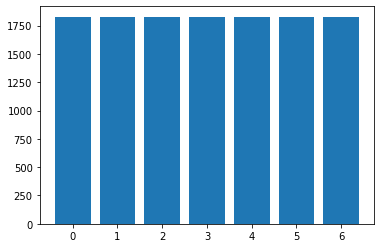

In [40]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE(random_state=777,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, df_cleaned['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,y_pred))

Accuracy: 72.40%
              precision    recall  f1-score   support

           0       0.70      0.58      0.64       566
           1       0.75      0.73      0.74       524
           2       0.60      0.57      0.59       557
           3       0.59      0.71      0.64       528
           4       0.76      0.81      0.78       560
           5       0.82      0.91      0.86       549
           6       0.86      0.77      0.81       557

    accuracy                           0.72      3841
   macro avg       0.73      0.72      0.72      3841
weighted avg       0.73      0.72      0.72      3841



In [42]:
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
accuracy = accuracy_score(y_test, pred_sgd)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,pred_sgd))

Accuracy: 89.61%
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       560
           1       0.88      0.95      0.91       556
           2       0.93      0.66      0.77       560
           3       0.89      0.90      0.89       526
           4       0.90      0.98      0.94       566
           5       0.89      0.99      0.94       547
           6       0.94      0.94      0.94       526

    accuracy                           0.90      3841
   macro avg       0.90      0.90      0.89      3841
weighted avg       0.90      0.90      0.89      3841

